In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings("ignore")

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
df= pd.read_csv("Churn_clean.csv")

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [9]:
# Creating X and y variables

X = df.drop("Churn", axis=1)
y= df["Churn"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
X_train.shape

(5625, 50)

In [12]:
X_test.shape

(1407, 50)

# Decision Tree Classifier

In [13]:
model = DecisionTreeClassifier(criterion='entropy',random_state=100, max_depth=6, min_samples_leaf=8)

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [15]:
# tree.plot_tree(model.fit(X_train,y_train))
# plt.show()


In [16]:
y_pred= model.predict(X_test)

In [17]:
model.score(X_test, y_test)

0.7683013503909026

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
import seaborn as sns

<Axes: >

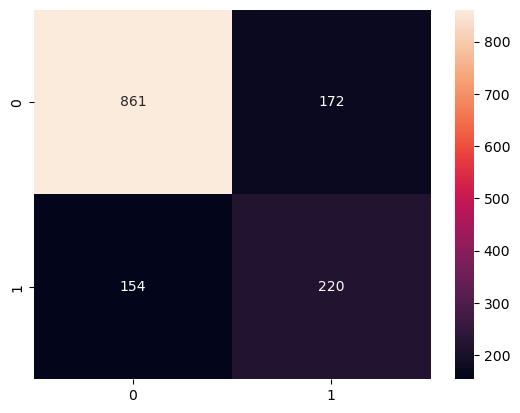

In [21]:
sns.heatmap(cm, annot=True, fmt=".0f")

In [22]:
sm = SMOTEENN()
X_resampled , y_resampled = sm.fit_resample(X,y)

In [23]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

model = DecisionTreeClassifier(criterion='entropy',random_state=100, max_depth=6, min_samples_leaf=8)
model.fit(X_train_re,y_train_re)
model.score(X_test_re, y_test_re)

0.9361702127659575

In [24]:
y_pred_re= model.predict(X_test_re)
print(classification_report(y_test_re, y_pred_re))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       547
           1       0.95      0.93      0.94       628

    accuracy                           0.94      1175
   macro avg       0.94      0.94      0.94      1175
weighted avg       0.94      0.94      0.94      1175



<Axes: >

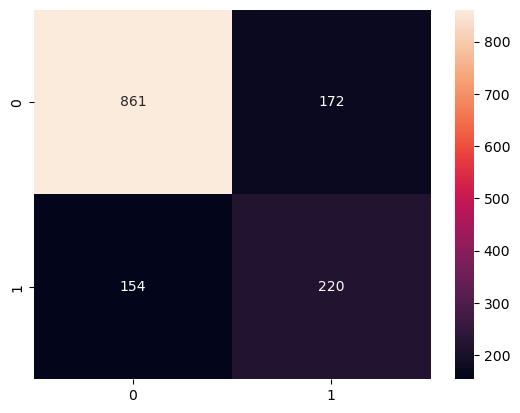

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")

# Random Forest Classifiers

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model_rf = RandomForestClassifier(n_estimators=100 , criterion="entropy", random_state=100, max_depth=6, min_samples_leaf=8)


In [28]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [29]:
model_rf.score(X_test, y_test)

0.7818052594171997

In [30]:
y_pred_rf = model_rf.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.63      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407



## Using resample  

In [32]:
model_rf_sm = RandomForestClassifier(n_estimators=100 , criterion="entropy", random_state=100, max_depth=6, min_samples_leaf=8)


In [33]:
model_rf_sm.fit(X_train_re, y_train_re)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [34]:
y_pred_smote = model_rf_sm.predict(X_test_re)

In [35]:
print(classification_report(y_test_re, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       547
           1       0.92      0.97      0.94       628

    accuracy                           0.94      1175
   macro avg       0.94      0.93      0.94      1175
weighted avg       0.94      0.94      0.94      1175



<Axes: >

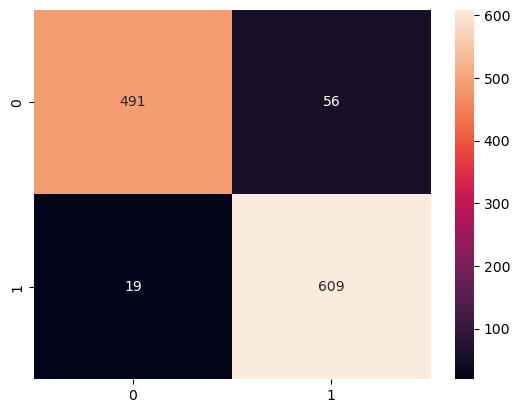

In [36]:
cm = confusion_matrix(y_test_re, y_pred_smote)
sns.heatmap(cm, annot=True, fmt=".0f")

In [37]:
model.score(X_test_re, y_test_re)

0.9361702127659575

In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
model_bg =BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=0.3, oob_score=True , random_state=0)

In [40]:
model_bg.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.3,
                  n_estimators=100, oob_score=True, random_state=0)

In [41]:
model_bg.oob_score_

0.7985777777777778

In [48]:
import pickle

In [49]:
filename = "model.pkl"

In [50]:
# pickle.dump(model_rf_sm, open(filename, 'wb'))

In [53]:
load_model = pickle.load(open(filename,'rb'))

In [55]:
load_model.score(X_test_re, y_test_re)

0.9361702127659575